# Async Exercise: Continuation of Citibike EDA

**Tableau**<br> Gayeta, Joana Feliz ; Go, Justin Ervin ; Guarisma, Jose Paolo  ; Intanao, Nick ; Tiburcio, Mark <br> DATAPRE-N01

---

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from scipy.stats import pearsonr

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('202102-citibike-tripdata.csv')
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,304,2021-02-01 00:04:23.0780,2021-02-01 00:09:27.7920,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,4045,West End Ave & W 60 St,40.772370,-73.990050,27451,Subscriber,1996,2
1,370,2021-02-01 00:07:08.8080,2021-02-01 00:13:19.4670,3154,E 77 St & 3 Ave,40.773142,-73.958562,3725,2 Ave & E 72 St,40.768762,-73.958408,35000,Subscriber,1991,1
2,635,2021-02-01 00:07:55.9390,2021-02-01 00:18:31.0390,502,Henry St & Grand St,40.714211,-73.981095,411,E 6 St & Avenue D,40.722281,-73.976687,49319,Subscriber,1980,2
3,758,2021-02-01 00:08:42.0960,2021-02-01 00:21:20.7820,3136,5 Ave & E 63 St,40.766368,-73.971518,3284,E 88 St & Park Ave,40.781411,-73.955959,48091,Customer,1969,0
4,522,2021-02-01 00:09:32.6820,2021-02-01 00:18:15.4100,505,6 Ave & W 33 St,40.749013,-73.988484,3687,E 33 St & 1 Ave,40.743227,-73.974498,48596,Subscriber,1988,1


In [3]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

data['dayofweek'] = data['starttime'].dt.dayofweek
data['hourofday'] = data['starttime'].dt.hour
data['year'] = data['starttime'].dt.year

data['duration_min'] = data['tripduration']/60

data['age'] = data['starttime'].dt.year - data['birth year']
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,dayofweek,hourofday,year,duration_min,age
0,304,2021-02-01 00:04:23.078,2021-02-01 00:09:27.792,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,4045,West End Ave & W 60 St,40.772370,-73.990050,27451,Subscriber,1996,2,0,0,2021,5.066667,25
1,370,2021-02-01 00:07:08.808,2021-02-01 00:13:19.467,3154,E 77 St & 3 Ave,40.773142,-73.958562,3725,2 Ave & E 72 St,40.768762,-73.958408,35000,Subscriber,1991,1,0,0,2021,6.166667,30
2,635,2021-02-01 00:07:55.939,2021-02-01 00:18:31.039,502,Henry St & Grand St,40.714211,-73.981095,411,E 6 St & Avenue D,40.722281,-73.976687,49319,Subscriber,1980,2,0,0,2021,10.583333,41
3,758,2021-02-01 00:08:42.096,2021-02-01 00:21:20.782,3136,5 Ave & E 63 St,40.766368,-73.971518,3284,E 88 St & Park Ave,40.781411,-73.955959,48091,Customer,1969,0,0,0,2021,12.633333,52
4,522,2021-02-01 00:09:32.682,2021-02-01 00:18:15.410,505,6 Ave & W 33 St,40.749013,-73.988484,3687,E 33 St & 1 Ave,40.743227,-73.974498,48596,Subscriber,1988,1,0,0,2021,8.700000,33


In [4]:
len(data)

634631

In [5]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the distance provided a pair of longitudes and latitudes
    using the Haversine formula
    
    Returns the distance in kilometers.
    """
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

data['distance_km'] = data.apply(lambda x: calculate_distance(x['start station latitude'], x['start station longitude'],
                                        x['end station latitude'], x['end station longitude']), axis=1)

In [6]:
data = data.rename(columns={"start station name":"startstationname"}, errors = False)
data = data.rename(columns={"end station name":"endstationname"}, errors = False)

## Bivariate: Trip duration & time of day

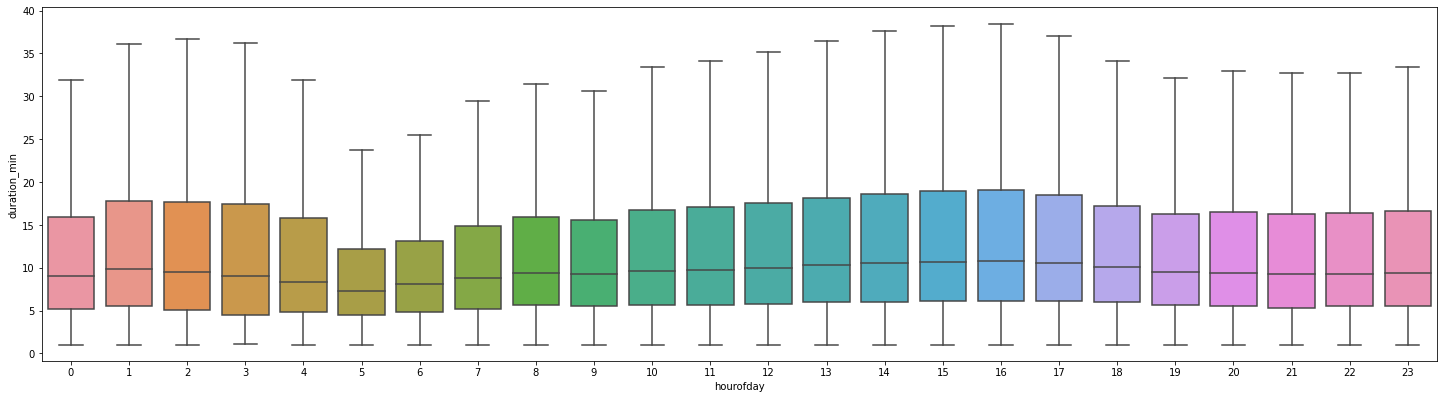

In [7]:
tripdur_time_plot = sns.boxplot(x="hourofday",y="duration_min",data=data, showfliers=False)
tripdur_time_plot.figure.set_size_inches(25, 6.5)

#### Observations
1. The Average of most of the trips usually lasts from 5-10 mins.
2. Trips during 5 oclock in the morning has the shortest trip duration compared to other hours.

---

## Bivariate: User type & age

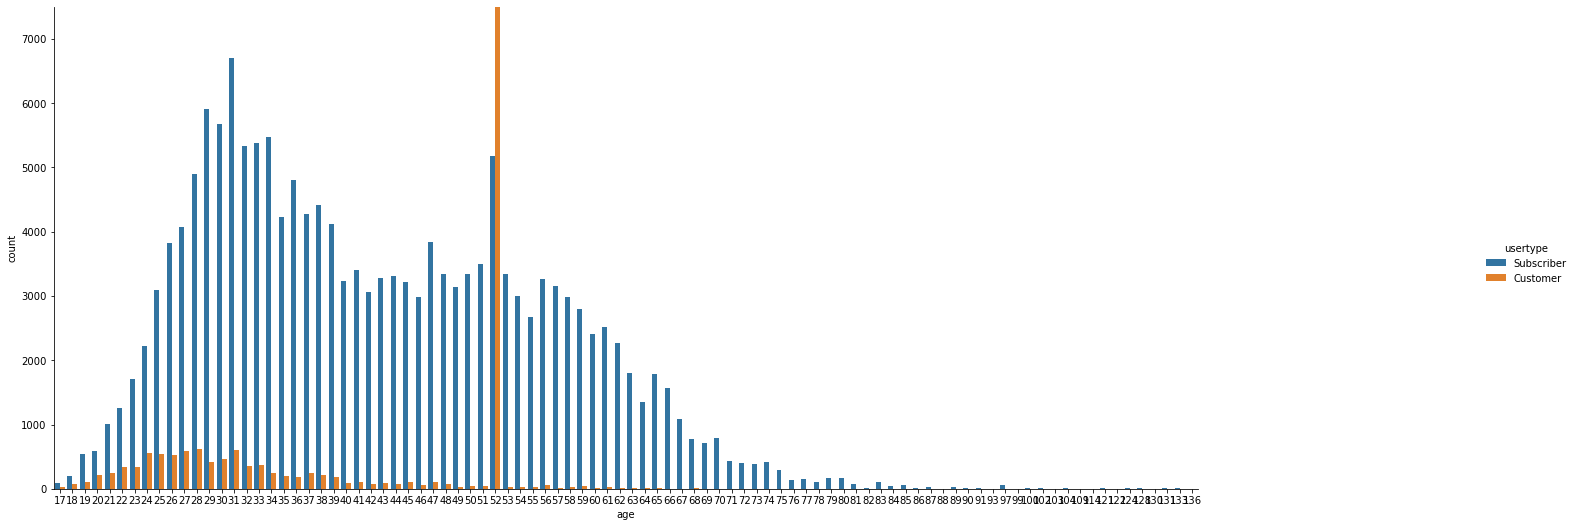

In [8]:
usertype_age_plot = sns.catplot(x="age", 
                                   kind="count", 
                                   hue="usertype", 
                                   data=data)
usertype_age_plot.set(ylim=(0,7500))
usertype_age_plot.fig.set_size_inches(25, 7.5)

#### Observations
1. Most of the 52 years old users of Citibike prefers not to subscribe to Citibike and instead use it for one-time only. 

---

## Bivariate: Start station & user type

In [9]:
#Get top 10 Station names
start_stations = data["startstationname"].value_counts().rename_axis('Stationname').reset_index(name='counts')
start_stations = start_stations.nlargest(10, 'counts')

start_stations

,Stationname,counts
0,1 Ave & E 68 St,4251
1,W 21 St & 6 Ave,3762
2,E 17 St & Broadway,3230
3,W 33 St & 7 Ave,3213
4,E 13 St & Avenue A,3044
5,E 33 St & 1 Ave,2970
6,Broadway & W 60 St,2757
7,Grand St & Elizabeth St,2700
8,Clinton St & Grand St,2620
9,Pershing Square North,2606


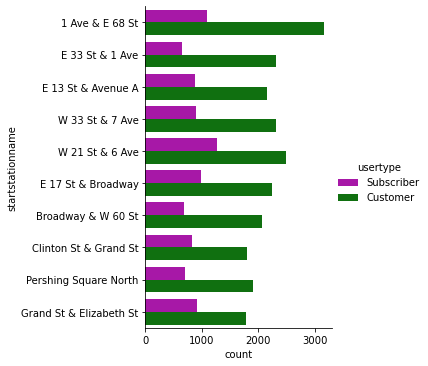

In [10]:
startstation_usertype_plot = sns.catplot(y="startstationname", 
                                        orient="h", 
                                        kind="count",
                                        hue = "usertype",
                                        palette={"Customer": "g", "Subscriber": "m"}, 
                                        data=data[data.startstationname.isin(start_stations.Stationname)])

#### Observations
1. Customers of Citibike commonly starts at '1 Ave & E 68 St'
2. Subscribers of citibike mostly starts at 'W 21 St & 6 Ave'

---

## Bivariate: End station & user type

In [11]:
#Get top 10 Station names
end_stations = data["endstationname"].value_counts().rename_axis('Stationname').reset_index(name='counts')
end_stations = end_stations.nlargest(10, 'counts')

end_stations

,Stationname,counts
0,1 Ave & E 68 St,4226
1,W 21 St & 6 Ave,3734
2,E 17 St & Broadway,3481
3,W 33 St & 7 Ave,3161
4,E 13 St & Avenue A,3043
5,E 33 St & 1 Ave,3004
6,Broadway & W 60 St,2789
7,Grand St & Elizabeth St,2723
8,Pershing Square North,2622
9,Clinton St & Grand St,2611


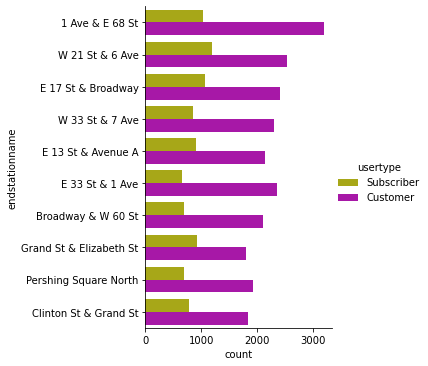

In [12]:
endstation_usertype_plot = sns.catplot(y="endstationname", 
                                orient="h", 
                                kind="count",
                                        order = ['1 Ave & E 68 St', 'W 21 St & 6 Ave', 'E 17 St & Broadway','W 33 St & 7 Ave'
                                        , 'E 13 St & Avenue A', 'E 33 St & 1 Ave', 'Broadway & W 60 St','Grand St & Elizabeth St',
                                        'Pershing Square North', 'Clinton St & Grand St'],
                                hue = "usertype",
                                 palette={"Customer": "m", "Subscriber": "y"}, 
                                data=data[data.endstationname.isin(end_stations.Stationname)])

#### Observations
1. Every station in the top 10 end point station list is mostly visited by customers than subscribers, which shows that there is significanlty more Customers than Subcribers.
2. Customers of Citibike commonly ends at '1 Ave & E 68 St'
3. Subscribers of citibike mostly ends at 'W 21 St & 6 Ave'

---

## Bivariate: End station & gender

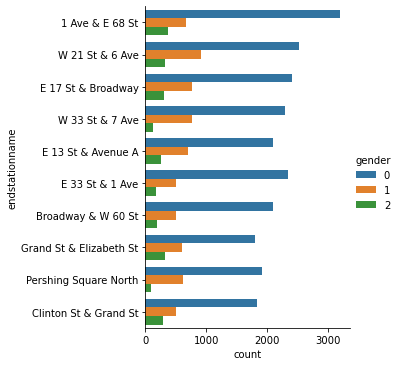

In [13]:
endstation_gender_plot = sns.catplot(y="endstationname", 
                                orient="h", 
                                kind="count",
                                order = ['1 Ave & E 68 St', 'W 21 St & 6 Ave', 'E 17 St & Broadway','W 33 St & 7 Ave'
                                        , 'E 13 St & Avenue A', 'E 33 St & 1 Ave', 'Broadway & W 60 St','Grand St & Elizabeth St',
                                        'Pershing Square North', 'Clinton St & Grand St'],
                                hue = "gender", 
                                data=data[data.endstationname.isin(end_stations.Stationname)])

#### Observations
1. Most of the users of citibike prefer not to say their gender
2. Male(1) users of citibike usually ends at 'W 21 St & 6 Ave'
3. Female (2) users of citibike usually ends at '1 Ave & E 68 St'

---

In [14]:
z_scores = zscore(data["duration_min"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
filtered_entries = (abs_z_scores < 3) 

# Array of boolean values where value is True if it is an outlier, otherwise False.
duration_min_outliers = (abs_z_scores >= 3)
data[duration_min_outliers].duration_min # Show outlier values

55        3793.983333
128       4257.516667
280       1364.983333
287       3014.366667
290       3205.933333
             ...     
631214    7005.816667
632255    1363.300000
633024    5281.700000
633398    6875.366667
633877    1165.300000
Name: duration_min, Length: 624, dtype: float64

In [15]:
data = data.rename(columns={"startstationname":"start station name"}, errors = False)
data = data.rename(columns={"endstationname":"end station name"}, errors = False)

## Multi: Start station, end station & trip duration

In [16]:
## Count of rides per OD
od_trips = data.groupby(['start station name', 'end station name'], as_index=False)['duration_min'].mean()
od_trips = od_trips.rename(columns={"start station name": "start", "end station name": "end", "duration_min": "average_tripduration"}, errors="raise")
od_trips

,start,end,average_tripduration
0,1 Ave & E 110 St,1 Ave & E 110 St,10.937255
1,1 Ave & E 110 St,1 Ave & E 68 St,14.568182
2,1 Ave & E 110 St,1 Ave & E 78 St,9.283333
3,1 Ave & E 110 St,1 Ave & E 94 St,72.150000
4,1 Ave & E 110 St,2 Ave & E 104 St,3.125000
...,...,...,...
164369,Wythe Ave & Metropolitan Ave,Willoughby Ave & Tompkins Ave,20.375000
164370,Wythe Ave & Metropolitan Ave,Willoughby Ave & Walworth St,15.316667
164371,Wythe Ave & Metropolitan Ave,Willoughby St & Fleet St,16.216667
164372,Wythe Ave & Metropolitan Ave,Wyckoff Av & Stanhope St,18.716667


In [17]:
od_topten = od_trips[od_trips.start.isin(start_stations["Stationname"]) & od_trips.end.isin(end_stations["Stationname"])]
od_topten

,start,end,average_tripduration
2318,1 Ave & E 68 St,1 Ave & E 68 St,31.282184
2433,1 Ave & E 68 St,Broadway & W 60 St,12.447748
2451,1 Ave & E 68 St,Clinton St & Grand St,25.666667
2482,1 Ave & E 68 St,E 13 St & Avenue A,22.502083
2489,1 Ave & E 68 St,E 17 St & Broadway,24.335185
...,...,...,...
145506,W 33 St & 7 Ave,E 33 St & 1 Ave,8.788486
145574,W 33 St & 7 Ave,Grand St & Elizabeth St,20.987500
145621,W 33 St & 7 Ave,Pershing Square North,7.454839
145660,W 33 St & 7 Ave,W 21 St & 6 Ave,7.970635


In [18]:
# Create a matrix

od_matrix = pd.pivot_table(od_topten, index='start', columns='end', values='average_tripduration', aggfunc=np.sum, fill_value=0)
od_matrix

end,1 Ave & E 68 St,Broadway & W 60 St,Clinton St & Grand St,E 13 St & Avenue A,E 17 St & Broadway,E 33 St & 1 Ave,Grand St & Elizabeth St,Pershing Square North,W 21 St & 6 Ave,W 33 St & 7 Ave
start,,,,,,,,,,
1 Ave & E 68 St,31.282184,12.447748,25.666667,22.502083,24.335185,14.389394,31.894872,13.441026,24.050000,21.531989
Broadway & W 60 St,12.321429,39.188577,38.483333,0.000000,26.266667,10.450000,45.950000,12.548148,15.933333,10.522222
Clinton St & Grand St,0.000000,36.050000,18.028866,8.691667,16.957576,731.200000,7.766481,25.233333,21.862500,0.000000
E 13 St & Avenue A,19.681667,0.000000,15.527778,17.557632,9.493333,7.983333,11.663636,15.944444,11.656667,15.743333
E 17 St & Broadway,25.112500,19.577778,15.740741,11.503261,15.694444,13.086364,14.170833,11.561667,7.985470,9.098718
E 33 St & 1 Ave,13.202083,29.833333,23.733333,9.998551,10.765104,16.549740,20.058333,8.326587,12.317708,8.707035
Grand St & Elizabeth St,29.350000,0.000000,6.808333,15.150000,13.958889,21.975000,14.905000,0.000000,18.404167,0.000000
Pershing Square North,12.144624,13.301852,21.172222,16.556250,68.326667,8.173611,0.000000,11.774074,11.289394,8.045635
W 21 St & 6 Ave,24.566667,17.837500,22.683333,11.287719,6.091333,10.562500,20.427083,11.640000,17.559420,8.205556


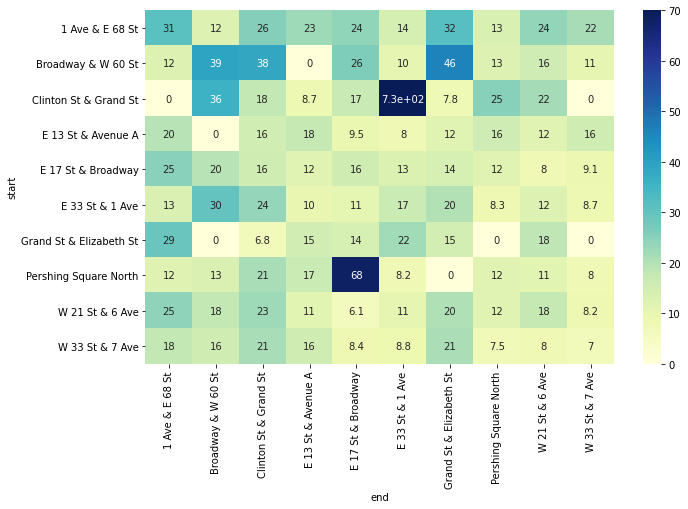

In [19]:
# Generate a heatmap
od_heatmap = sns.heatmap(od_matrix, cmap="YlGnBu", vmin=0, vmax=70, annot=True )
od_heatmap.figure.set_size_inches(10.5, 6.5)

#### Observations
1. Among all the trips, the trip from Clinton St & Grand St toE 33 St & 1 Ave  has the longest trip duration followed by the trip from Pershing Square North to E 17 St & Broadway.

---

## Multi: Start station, end station & unique users

In [20]:
#Combine dat with similar bikeID 
startend_unique= data.groupby(['start station name', 'end station name', 'bikeid']).size().reset_index(name='counts')
startend_unique = startend_unique.rename(columns={"start station name": "Start", "end station name": "End", "bikeid": "userID"}, errors="raise")
startend_unique.head()

,Start,End,userID,counts
0,1 Ave & E 110 St,1 Ave & E 110 St,29767,1
1,1 Ave & E 110 St,1 Ave & E 110 St,33294,1
2,1 Ave & E 110 St,1 Ave & E 110 St,36790,1
3,1 Ave & E 110 St,1 Ave & E 110 St,37018,1
4,1 Ave & E 110 St,1 Ave & E 110 St,37186,1


In [21]:
len(startend_unique)

628145

In [22]:
# Get the number of uniqueusers
startenduniqueID = startend_unique.groupby(['Start', 'End'])['userID'].size().reset_index(name='#of_UniqueUser')
startenduniqueID

,Start,End,#of_UniqueUser
0,1 Ave & E 110 St,1 Ave & E 110 St,16
1,1 Ave & E 110 St,1 Ave & E 68 St,11
2,1 Ave & E 110 St,1 Ave & E 78 St,1
3,1 Ave & E 110 St,1 Ave & E 94 St,2
4,1 Ave & E 110 St,2 Ave & E 104 St,2
...,...,...,...
164369,Wythe Ave & Metropolitan Ave,Willoughby Ave & Tompkins Ave,2
164370,Wythe Ave & Metropolitan Ave,Willoughby Ave & Walworth St,1
164371,Wythe Ave & Metropolitan Ave,Willoughby St & Fleet St,1
164372,Wythe Ave & Metropolitan Ave,Wyckoff Av & Stanhope St,1


In [23]:
startendunique10 = startenduniqueID[startenduniqueID.Start.isin(start_stations["Stationname"]) & startenduniqueID.End.isin(end_stations["Stationname"])]
startendunique10

,Start,End,#of_UniqueUser
2318,1 Ave & E 68 St,1 Ave & E 68 St,79
2433,1 Ave & E 68 St,Broadway & W 60 St,37
2451,1 Ave & E 68 St,Clinton St & Grand St,2
2482,1 Ave & E 68 St,E 13 St & Avenue A,8
2489,1 Ave & E 68 St,E 17 St & Broadway,9
...,...,...,...
145506,W 33 St & 7 Ave,E 33 St & 1 Ave,203
145574,W 33 St & 7 Ave,Grand St & Elizabeth St,4
145621,W 33 St & 7 Ave,Pershing Square North,92
145660,W 33 St & 7 Ave,W 21 St & 6 Ave,21


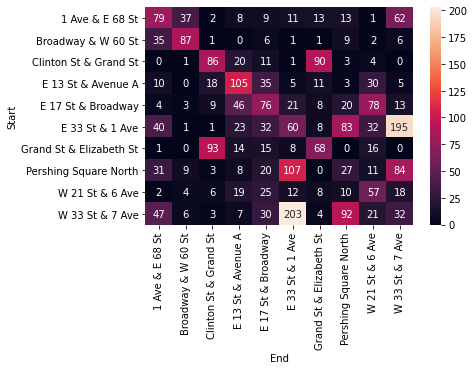

In [24]:
startendunique_matrix = pd.pivot_table(data=startendunique10,
                                       index='Start', columns='End', values='#of_UniqueUser', aggfunc=np.sum, fill_value=0)
startendunique_heatmap = sns.heatmap(startendunique_matrix, annot=True, fmt="d")

#### Observations
1. Among the top 10 start and end stations, the starting point 'W 33 St & 7 Ave' and ending point 'E 33 St & 1 Ave' have the most number of unique users followed by the 'E 33 St & 1 Ave' to 'W 33 St & 7 Ave'

---

## Multi: Start station, end station & user type

In [25]:
startend_usertype= data.groupby(['start station name', 'end station name', 'usertype']).size().reset_index(name='counts')
startend_usertype = startend_usertype.rename(columns={"start station name": "Start", "end station name": "End", "usertype": "UserType"}, errors="raise")
startend_usertype.head()

,Start,End,UserType,counts
0,1 Ave & E 110 St,1 Ave & E 110 St,Customer,12
1,1 Ave & E 110 St,1 Ave & E 110 St,Subscriber,5
2,1 Ave & E 110 St,1 Ave & E 68 St,Customer,10
3,1 Ave & E 110 St,1 Ave & E 68 St,Subscriber,1
4,1 Ave & E 110 St,1 Ave & E 78 St,Subscriber,1


In [26]:
# top 10

trip=startend_usertype
trip10= trip[trip.Start.isin(start_stations["Stationname"]) & trip.End.isin(end_stations["Stationname"])]
trip10

,Start,End,UserType,counts
3254,1 Ave & E 68 St,1 Ave & E 68 St,Customer,69
3255,1 Ave & E 68 St,1 Ave & E 68 St,Subscriber,18
3416,1 Ave & E 68 St,Broadway & W 60 St,Customer,22
3417,1 Ave & E 68 St,Broadway & W 60 St,Subscriber,15
3444,1 Ave & E 68 St,Clinton St & Grand St,Customer,1
...,...,...,...,...
189370,W 33 St & 7 Ave,Pershing Square North,Subscriber,23
189423,W 33 St & 7 Ave,W 21 St & 6 Ave,Customer,13
189424,W 33 St & 7 Ave,W 21 St & 6 Ave,Subscriber,8
189441,W 33 St & 7 Ave,W 33 St & 7 Ave,Customer,25


Text(0.5, 0.98, 'Heatmap for Customers')

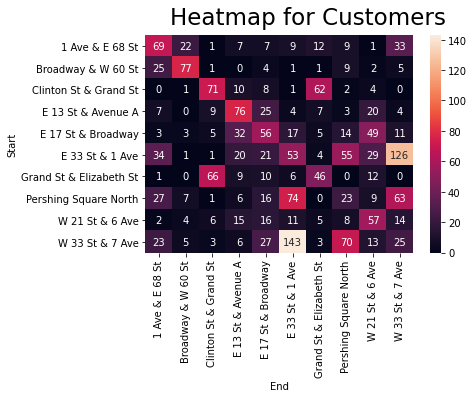

In [27]:
#for Customers
tripcustomer_matrix = pd.pivot_table(data=trip10[trip10["UserType"] == "Customer"], index='Start', columns='End', values='counts', aggfunc=np.sum, fill_value=0)
tripcustomer_heatmap = sns.heatmap(tripcustomer_matrix, annot=True, fmt="d")
tripcustomer_heatmap.figure.suptitle('Heatmap for Customers', size=23)

Text(0.5, 0.98, 'Heatmap for Subscriber')

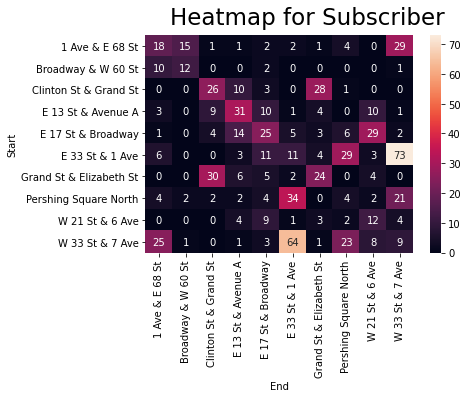

In [28]:
# for Subscriber
tripsubscriber_matrix =pd.pivot_table(data=trip10[trip10["UserType"] == "Subscriber"], index='Start', columns='End', values='counts', aggfunc=np.sum, fill_value=0)
tripsubscriber_heatmap = sns.heatmap(tripsubscriber_matrix, annot=True, fmt="d")
tripsubscriber_heatmap.figure.suptitle('Heatmap for Subscriber', size=23)

#### Observations:
1. Cutomers of citibike usually starts from 'W 33 St & 7 Ave' and ends at 'E 33 St & 1 Ave'.
2. Subscribers of citibike tends to start from 'E 33 St & 1 Ave' and ends from 'W 33 St & 7 Ave'

---

## Multi: Trip distance, duration & gender

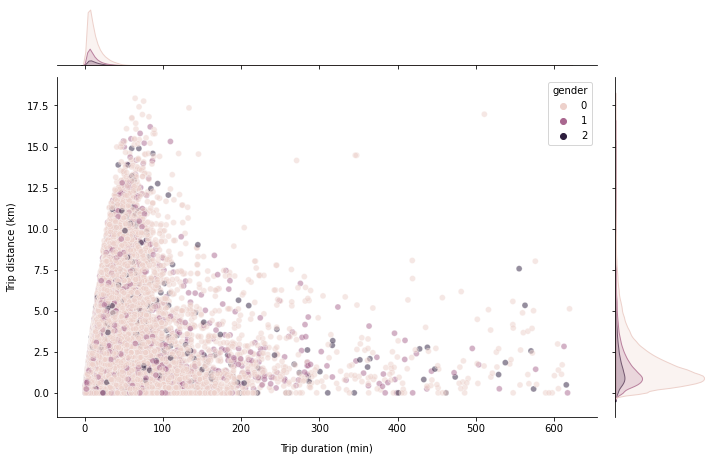

In [29]:
dur_dist_gender_plot = sns.jointplot(data=data[filtered_entries], 
                                   x="duration_min", 
                                   y="distance_km", 
                                   hue="gender",
                                
                                   alpha=0.5)
dur_dist_gender_plot.set_axis_labels("Trip duration (min)", "Trip distance (km)", labelpad=10)
dur_dist_gender_plot.fig.set_size_inches(10.5, 6.5)

#### Observations
1. Most of the users does not want to specify their gender.
2. Users of citibike who mostly prefers not to say their gender usually takes 200 mins or less, while they travel.
3. There are some users with different genders who would take more than 200 mins but has travelled less.

---

## Multi: Average trip distance per unique user, average duration per unique user & user type

In [30]:
#Combine data with similar bikeID 
avedist_avedur_usertype_distance = data.groupby(['bikeid'])['distance_km'].mean().reset_index(name='ave_distance')
avedist_avedur_usertype_duration = data.groupby(['bikeid'])['duration_min'].mean().reset_index(name='ave_duration')
avedist_avedur_usertype_usertype = data.groupby(['bikeid','usertype']).size().reset_index(name='count')

In [31]:
avedist_avedur_usertype =  avedist_avedur_usertype_distance
avedist_avedur_usertype['ave_duration'] = avedist_avedur_usertype_duration[avedist_avedur_usertype_duration.bikeid.isin(avedist_avedur_usertype.bikeid)].ave_duration
avedist_avedur_usertype ['userType'] = avedist_avedur_usertype_usertype[avedist_avedur_usertype_usertype.bikeid.isin(avedist_avedur_usertype.bikeid)].usertype
avedist_avedur_usertype

,bikeid,ave_distance,ave_duration,userType
0,14534,1.582827,9.266667,Customer
1,14536,0.722067,9.805556,Subscriber
2,14555,1.067159,6.888889,Customer
3,14559,1.599741,11.383333,Subscriber
4,14576,1.470918,11.527778,Customer
...,...,...,...,...
15765,50103,2.133149,11.420482,Subscriber
15766,50106,1.258313,8.755208,Customer
15767,50123,2.837297,21.058889,Subscriber
15768,50124,2.075255,11.886525,Customer


In [32]:
z_scores = zscore(avedist_avedur_usertype["ave_duration"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
filtered_entries2 = (abs_z_scores < 3) 

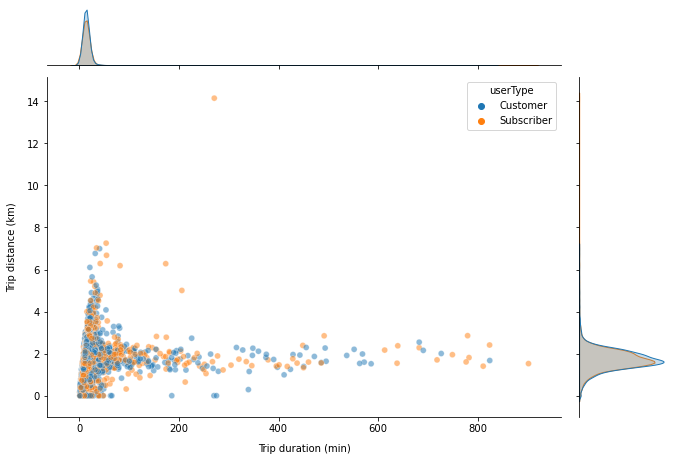

In [33]:
avedist_avedur_usertype_plot = sns.jointplot(data=avedist_avedur_usertype[filtered_entries2], 
                                   x="ave_duration", 
                                   y="ave_distance", 
                                   hue="userType",
                                
                                   alpha=0.5)
avedist_avedur_usertype_plot.set_axis_labels("Trip duration (min)", "Trip distance (km)", labelpad=10)
avedist_avedur_usertype_plot.fig.set_size_inches(10, 6.5)

#### Observations:
1. Subscribers tend to use the bikes for a long period of time compared to customers.

---

## Multi: Average trip distance per unique user, average duration per unique user, gender & user type

In [34]:
addgender = data.groupby(['bikeid','gender']).size().reset_index(name='count')

avedist_avedur_usertype_gender = avedist_avedur_usertype
avedist_avedur_usertype_gender ['gender'] = addgender[addgender.bikeid.isin(avedist_avedur_usertype_gender.bikeid)].gender
avedist_avedur_usertype_gender 

,bikeid,ave_distance,ave_duration,userType,gender
0,14534,1.582827,9.266667,Customer,0
1,14536,0.722067,9.805556,Subscriber,1
2,14555,1.067159,6.888889,Customer,0
3,14559,1.599741,11.383333,Subscriber,1
4,14576,1.470918,11.527778,Customer,0
...,...,...,...,...,...
15765,50103,2.133149,11.420482,Subscriber,2
15766,50106,1.258313,8.755208,Customer,0
15767,50123,2.837297,21.058889,Subscriber,1
15768,50124,2.075255,11.886525,Customer,2


In [35]:
z_scores = zscore(avedist_avedur_usertype_gender["ave_duration"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
filtered_entries3 = (abs_z_scores < 3) 

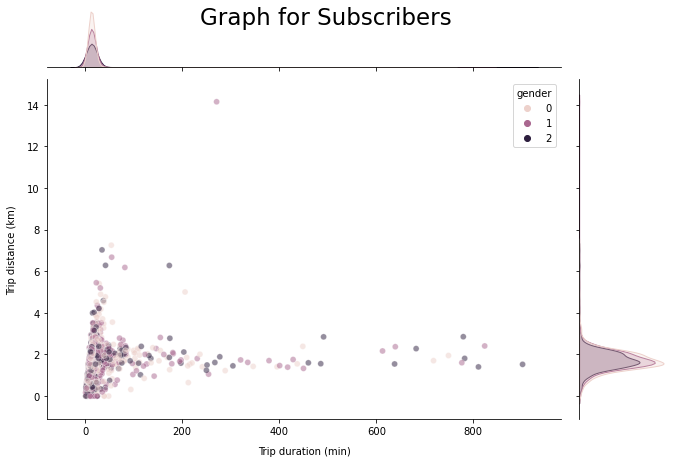

In [36]:
#Graph for Subscribers
temp = avedist_avedur_usertype_gender[filtered_entries3]

avedist_avedur_subscriber_gender_plot = sns.jointplot(data=temp[temp['userType']=="Subscriber"], x="ave_duration",  y="ave_distance",  hue="gender", alpha=0.5)
avedist_avedur_subscriber_gender_plot.set_axis_labels("Trip duration (min)", "Trip distance (km)", labelpad=10)
avedist_avedur_subscriber_gender_plot.fig.suptitle('Graph for Subscribers', size = 23)
avedist_avedur_subscriber_gender_plot.fig.set_size_inches(10, 6.5)


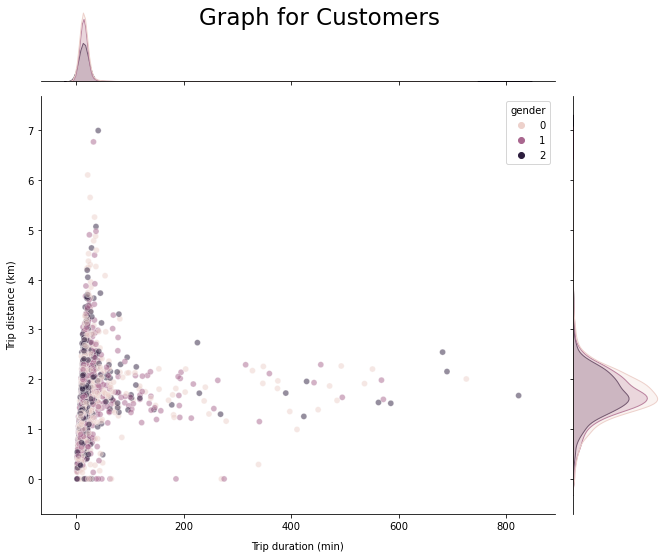

In [37]:
#Graph for Customers

avedist_avedur_customer_gender_plot = sns.jointplot(data=temp[temp['userType']=="Customer"], x="ave_duration",  y="ave_distance",  hue="gender", alpha=0.5)
avedist_avedur_customer_gender_plot.set_axis_labels("Trip duration (min)", "Trip distance (km)", labelpad=10)
avedist_avedur_customer_gender_plot.fig.suptitle('Graph for Customers', size = 23)
avedist_avedur_customer_gender_plot.fig.set_size_inches(10, 8)

#### Observation
1. There are a lot of customers than subscribers.
2. There are some female(2) subscriber and customer who uses the bike for a long time but only travels a short distance